In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in our list.
for i in range(len(cities)):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | maine-soroa
Processing Record 2 of Set 13 | yar-sale
Processing Record 3 of Set 13 | cidreira
Processing Record 4 of Set 13 | sergeyevka
Processing Record 5 of Set 13 | ushuaia
Processing Record 6 of Set 13 | carnarvon
Processing Record 7 of Set 13 | mataura
Processing Record 8 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 13 | namibe
Processing Record 10 of Set 13 | tasiilaq
Processing Record 11 of Set 13 | moerai
Processing Record 12 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 13 | poum
Processing Record 14 of Set 13 | bengkulu
Processing Record 15 of Set 13 | barrow
Processing Record 16 of Set 13 | dois vizinhos
Processing Record 17 of Set 13 | san cristobal
Processing Record 18 of Set 13 | punta arenas
City not found. Skipping...
Processing Record 19 of Set 13 | viedma
Processing Record 20 of Set 13 | soligalich
Processing Record 21 of Set 13 | trebinje
Processing Record 22 of Set 13 | am

Processing Record 35 of Set 16 | pevek
Processing Record 36 of Set 16 | esperance
Processing Record 37 of Set 16 | gwadar
Processing Record 38 of Set 16 | qui nhon
Processing Record 39 of Set 16 | kloulklubed
Processing Record 40 of Set 16 | malumfashi
Processing Record 41 of Set 16 | saleaula
City not found. Skipping...
Processing Record 42 of Set 16 | ostersund
Processing Record 43 of Set 16 | warqla
City not found. Skipping...
Processing Record 44 of Set 16 | lavrentiya
Processing Record 45 of Set 16 | druzhba
Processing Record 46 of Set 16 | amderma
City not found. Skipping...
Processing Record 47 of Set 16 | charlestown
Processing Record 48 of Set 16 | bur gabo
City not found. Skipping...
Processing Record 49 of Set 16 | sligo
Processing Record 50 of Set 16 | souillac
Processing Record 1 of Set 17 | clinton
Processing Record 2 of Set 17 | bredasdorp
Processing Record 3 of Set 17 | quelimane
Processing Record 4 of Set 17 | dingle
Processing Record 5 of Set 17 | batemans bay
Process

Processing Record 20 of Set 20 | rolim de moura
City not found. Skipping...
Processing Record 21 of Set 20 | cobija
Processing Record 22 of Set 20 | kristiinankaupunki
Processing Record 23 of Set 20 | solnechnyy
Processing Record 24 of Set 20 | nelson bay
Processing Record 25 of Set 20 | sioux lookout
Processing Record 26 of Set 20 | jalu
Processing Record 27 of Set 20 | bardiyah
Processing Record 28 of Set 20 | aksarka
Processing Record 29 of Set 20 | sivaki
Processing Record 30 of Set 20 | nawa
Processing Record 31 of Set 20 | manavalakurichi
Processing Record 32 of Set 20 | poopo
Processing Record 33 of Set 20 | gat
Processing Record 34 of Set 20 | boyolangu
Processing Record 35 of Set 20 | muyezerskiy
Processing Record 36 of Set 20 | savonlinna
Processing Record 37 of Set 20 | saumur
Processing Record 38 of Set 20 | vila velha
Processing Record 39 of Set 20 | ahuimanu
Processing Record 40 of Set 20 | lompoc
Processing Record 41 of Set 20 | higuey
City not found. Skipping...
Process

Processing Record 7 of Set 24 | pacific grove
Processing Record 8 of Set 24 | brae
Processing Record 9 of Set 24 | maldonado
Processing Record 10 of Set 24 | izhma
Processing Record 11 of Set 24 | nguiu
City not found. Skipping...
Processing Record 12 of Set 24 | port hedland
Processing Record 13 of Set 24 | mount gambier
Processing Record 14 of Set 24 | argelia
Processing Record 15 of Set 24 | borovoy
Processing Record 16 of Set 24 | comodoro rivadavia
Processing Record 17 of Set 24 | cacapava do sul
Processing Record 18 of Set 24 | kyzyl-suu
Processing Record 19 of Set 24 | sao jose da coroa grande
Processing Record 20 of Set 24 | taree
Processing Record 21 of Set 24 | mikun
Processing Record 22 of Set 24 | mahibadhoo
Processing Record 23 of Set 24 | charters towers
Processing Record 24 of Set 24 | sivas
Processing Record 25 of Set 24 | shimoda
Processing Record 26 of Set 24 | victor harbor
Processing Record 27 of Set 24 | hatton
Processing Record 28 of Set 24 | sakakah
Processing Re

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xai-Xai,-25.0519,33.6442,74.23,79,0,7.83,MZ,2022-02-12 20:24:33
1,Talnakh,69.4865,88.3972,-8.59,79,14,9.42,RU,2022-02-12 20:24:33
2,Ushuaia,-54.8000,-68.3000,47.86,53,40,42.57,AR,2022-02-12 20:24:33
3,Butaritari,3.0707,172.7902,82.80,69,98,15.86,KI,2022-02-12 20:24:34
4,Saint George,37.1041,-113.5841,68.47,15,0,4.61,US,2022-02-12 20:20:30
...,...,...,...,...,...,...,...,...,...
549,Fare,-16.7000,-151.0167,81.34,71,97,13.27,PF,2022-02-12 20:38:41
550,Ambulu,-8.3450,113.6058,75.42,88,100,3.18,ID,2022-02-12 20:38:41
551,Krasnoborsk,61.5598,45.9340,13.41,96,96,6.08,RU,2022-02-12 20:38:41
552,Waipawa,-41.4122,175.5153,52.45,97,100,22.97,NZ,2022-02-12 20:38:41


In [9]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Xai-Xai,MZ,2022-02-12 20:24:33,-25.0519,33.6442,74.23,79,0,7.83
1,Talnakh,RU,2022-02-12 20:24:33,69.4865,88.3972,-8.59,79,14,9.42
2,Ushuaia,AR,2022-02-12 20:24:33,-54.8000,-68.3000,47.86,53,40,42.57
3,Butaritari,KI,2022-02-12 20:24:34,3.0707,172.7902,82.80,69,98,15.86
4,Saint George,US,2022-02-12 20:20:30,37.1041,-113.5841,68.47,15,0,4.61
...,...,...,...,...,...,...,...,...,...
549,Fare,PF,2022-02-12 20:38:41,-16.7000,-151.0167,81.34,71,97,13.27
550,Ambulu,ID,2022-02-12 20:38:41,-8.3450,113.6058,75.42,88,100,3.18
551,Krasnoborsk,RU,2022-02-12 20:38:41,61.5598,45.9340,13.41,96,96,6.08
552,Waipawa,NZ,2022-02-12 20:38:41,-41.4122,175.5153,52.45,97,100,22.97


In [13]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644699492.347834

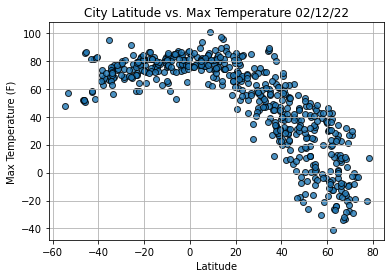

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

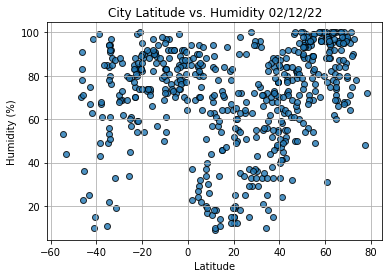

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

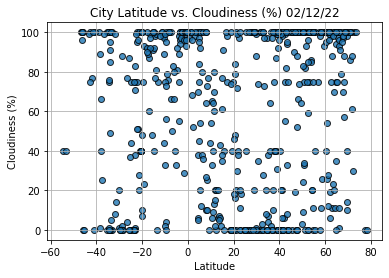

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

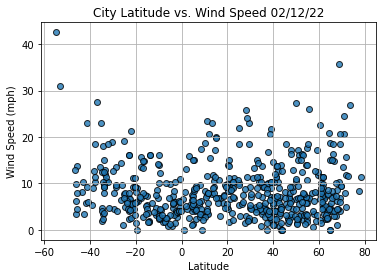

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

IndentationError: expected an indented block (Temp/ipykernel_20052/755688848.py, line 3)

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

City                       Bethel
Country                        US
Date          2022-02-12 20:23:26
Lat                       41.3712
Lng                       -73.414
Max Temp                     56.3
Humidity                       45
Cloudiness                      0
Wind Speed                   11.5
Name: 13, dtype: object

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

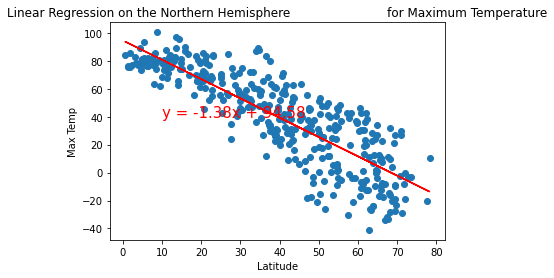

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

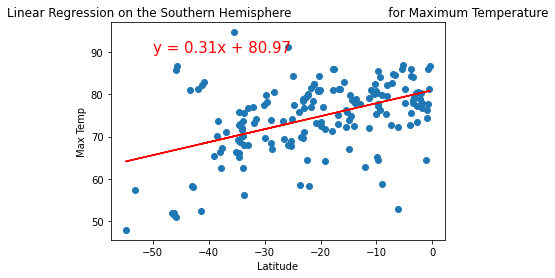

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

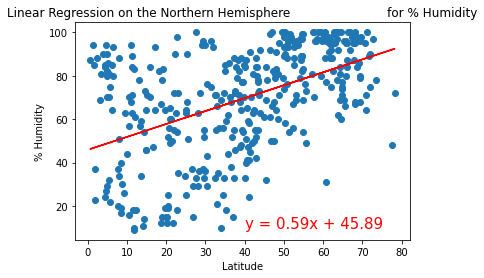

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

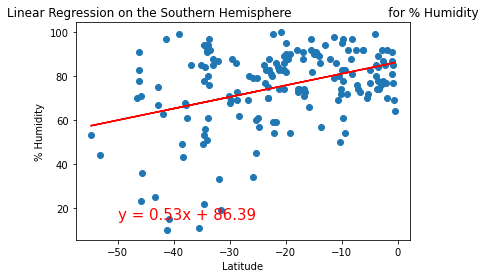

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

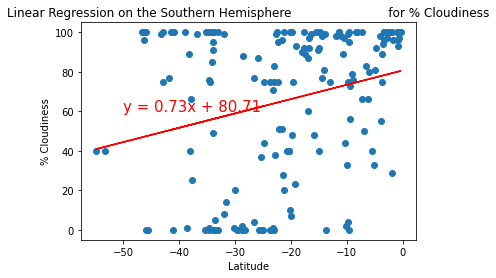

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

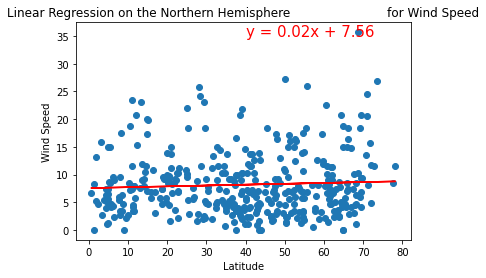

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

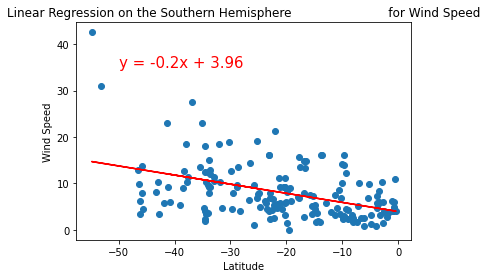

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))